<a href="https://colab.research.google.com/github/Ekta-kature/Capstone/blob/main/Basics_of_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Deep learning**
Deep learning is a subset of machine learning, which is itself a branch of artificial intelligence (AI). It involves training artificial neural networks on large amounts of data to model complex patterns and make predictions.

To understand this topic explicitly lets take an example using MNIST datset, which contains handwritten digits. The primary goal is to classify images of handwritten digits (0-9) correctly. Here's a detailed overview of what this example entails:

## **Objective:-**
The main objective is to build a neural network model that can recognize handwritten digits from the MNIST dataset with high accuracy. The process involves several steps, including data preprocessing, model definition, training, and evaluation.

### 1.Install necessary libraries

In [ ]:
!pip install torchviz

### 2. Importing Libraries

**torch and torch.nn** are PyTorch libraries for building and training neural networks.

**torch.optim** provides various optimization algorithms.

**torchvision** is used for computer vision tasks, containing datasets, models, and transforms.

**transforms** helps in pre-processing and augmenting the data.

**DataLoader** is used to load data from a dataset.

**torch.nn.functional** contains functions for various operations like activation functions and loss functions.

**matplotlib.pyplot and numpy** are used for plotting and numerical operations respectively.

**torchviz.make_dot** is used for visualizing the model architecture.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F  # Add this line
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot

### 2.Define Transformations

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

## 3.Load the Datasets

In [ ]:
# Load the datasets
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

## 5.Define the deep learning model

In [ ]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## 6. Instantiate Model, Loss Function, and Optimizer

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_accuracies = []

## 7.Train the model

In [ ]:
# Train the model
for epoch in range(10):  # number of epochs
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            average_loss = running_loss / 200
            accuracy = 100 * correct / total
            train_losses.append(average_loss)
            train_accuracies.append(accuracy)
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {average_loss:.3f}, accuracy: {accuracy:.2f}%')
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Batch 200] loss: 0.526, accuracy: 83.41%
[Epoch 1, Batch 400] loss: 0.132, accuracy: 89.76%
[Epoch 1, Batch 600] loss: 0.098, accuracy: 92.26%
[Epoch 1, Batch 800] loss: 0.091, accuracy: 93.49%
[Epoch 1, Batch 1000] loss: 0.079, accuracy: 94.29%
[Epoch 1, Batch 1200] loss: 0.071, accuracy: 94.87%
[Epoch 1, Batch 1400] loss: 0.075, accuracy: 95.27%
[Epoch 1, Batch 1600] loss: 0.064, accuracy: 95.58%
[Epoch 1, Batch 1800] loss: 0.062, accuracy: 95.85%
[Epoch 2, Batch 200] loss: 0.042, accuracy: 98.66%
[Epoch 2, Batch 400] loss: 0.041, accuracy: 98.65%
[Epoch 2, Batch 600] loss: 0.047, accuracy: 98.62%
[Epoch 2, Batch 800] loss: 0.042, accuracy: 98.64%
[Epoch 2, Batch 1000] loss: 0.040, accuracy: 98.63%
[Epoch 2, Batch 1200] loss: 0.048, accuracy: 98.62%
[Epoch 2, Batch 1400] loss: 0.047, accuracy: 98.62%
[Epoch 2, Batch 1600] loss: 0.041, accuracy: 98.63%
[Epoch 2, Batch 1800] loss: 0.039, accuracy: 98.64%
[Epoch 3, Batch 200] loss: 0.031, accuracy: 99.16%
[Epoch 3, Batch 400] 

## 8.Evaluate the Model

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 99.14%


## 9.Visualization

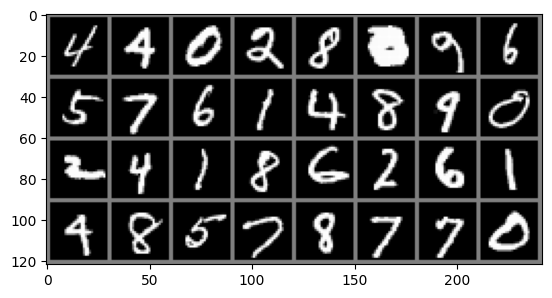

4 4 0 2


'cnn_model.png'

In [ ]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{labels[j]}' for j in range(4)))

# Visualize the model architecture
sample_input = torch.randn(1, 1, 28, 28)
output = model(sample_input)
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("cnn_model", format="png")


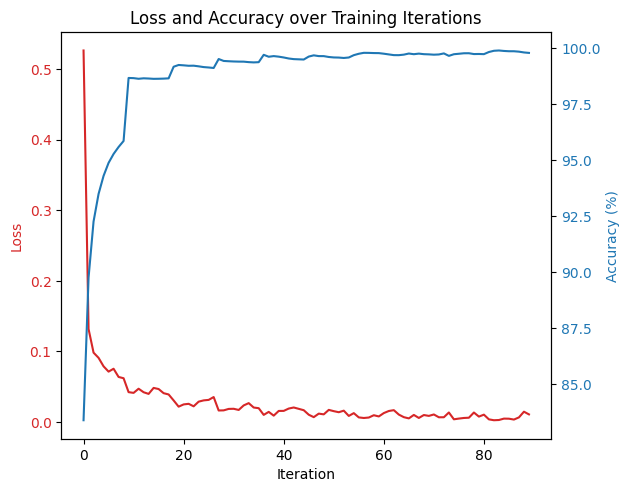

In [ ]:
# Plot loss and accuracy
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(len(train_losses)), train_losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(train_accuracies)), train_accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Loss and Accuracy over Training Iterations')
plt.show()

CONCLUSION:

This simple example provides a solid foundation for understanding the basic structure and workflow of training a deep learning model using PyTorch. It covers the essential components, such as defining the network architecture, loading and preprocessing data, setting up the training process, and evaluating the model's performance.